In [112]:
import pandas as pd
from collections import Counter
import re
import numpy as np
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [169]:
df1 = pd.read_csv("/home/sathyanarayanan/Desktop/NLP project/FAKE NEWS DETECTION/Scraping data/NYT_DB.csv")

In [170]:
df_all = pd.concat([df1],axis=0,ignore_index=True).reset_index()

In [171]:
del df1

In [172]:
# Number of articles in each section
Counter(df_all.section_name)

Counter({'Africa': 143,
         'Americas': 180,
         'América': 10,
         'Art': 4,
         'Art & Design': 64,
         'Asia Pacific': 379,
         'Australia': 19,
         'Auto Racing': 27,
         'Baseball': 132,
         'Book Review': 69,
         'Canada': 11,
         'College Basketball': 163,
         'College Football': 17,
         'Commercial Real Estate': 5,
         'Cricket': 58,
         'Cycling': 3,
         'DVD': 1,
         'Dance': 37,
         'DealBook': 91,
         'Design': 1,
         'Design & Interiors': 3,
         'Eat': 1,
         'Economy': 24,
         'Energy & Environment ': 15,
         'Entrepreneurship': 2,
         'Europe': 880,
         'Family': 12,
         'Fashion & Beauty': 4,
         'Food': 1,
         'Golf': 69,
         'Hockey': 86,
         'Horse Racing': 1,
         'International Arts': 2,
         'International Business': 14,
         'International Sports': 1,
         'Korean': 2,
         'Lesson Plans': 5

In [173]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8382 entries, 0 to 8381
Data columns (total 10 columns):
level_0           8382 non-null int64
index             0 non-null float64
_id               8382 non-null object
body              8382 non-null object
headline          8382 non-null object
keywords          8382 non-null object
lead_paragraph    0 non-null float64
pub_date          8382 non-null object
section_name      4240 non-null object
word_count        8382 non-null int64
dtypes: float64(2), int64(2), object(6)
memory usage: 654.9+ KB


In [174]:
# Dropping unnecesary columns
df_all = df_all.drop(["index"],axis=1)

In [175]:
df_all = df_all.reset_index()

In [176]:
df_all.headline[29]

'{"main":"Michael Bennett Appears in Court and His Lawyer Denies Charges","kicker":null,"content_kicker":null,"print_headline":"","name":null,"seo":null,"sub":null}'

In [177]:
# Getting only needed main headline
lst_head = []
for idx,item in enumerate(df_all.headline): 
    lst_head.append(" ".join(df_all.headline[idx].replace("'","").split(",")[0].split(" ")[1:]))

In [178]:
df_all['head_clean'] = lst_head

In [179]:
df_all = df_all.drop(["headline"],axis=1)

In [180]:
# Cleaning the data
for idx, item in enumerate(df_all.body):
    df_all.body[idx] = re.sub('(\\n)',"",item)
    if idx%500 == 0:
        print ('Here is the ',idx,'th item')

/home/sathyanarayanan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item


In [181]:
# Cleaning the data
for idx, item in enumerate(df_all.head_clean):
    df_all.head_clean[idx] = re.sub('(\\n)',"",item)
    if idx%500 == 0:
        print ('Here is the ',idx,'th item')

/home/sathyanarayanan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item


In [182]:
#Cleaning the data

slash_text = []
slash_title = []
for idx, item in enumerate(df_all.body):
    
    try:
        df_all.body[idx] = re.sub('(\\n)',"",item)
    except:
        df_all.body[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    
        
        
for idx, item in enumerate(df_all.head_clean):
    
    try:
        df_all.head_clean[idx] = re.sub('(\\n)',"",item)

    except:
        df_all.head_clean[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    

/home/sathyanarayanan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/sathyanarayanan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [183]:
# Saving the clean data to csv file
df_all.to_csv("/home/sathyanarayanan/Desktop/NLP project/FAKE NEWS DETECTION/NYT_final.csv")

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [189]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tdf.fit(df_all.body)
transformed_text = vectorizer.transform(df_all.body)
transformed_title = vectorizer.transform(df_all.head_clean)

In [192]:
def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

In [193]:
 #list of features created by tfidf
feature_names = tdf.get_feature_names()

In [194]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [195]:
print ("Number of columns is: ",len(term_corpus_dict.keys()))

Number of columns is:  1880604


In [196]:
def get_sorted_tfidf_scores(term_corpus_dict):
    '''Returns sort words from highest score to lowest score'''
    # sort indices from words wit highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [197]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [198]:
def getSelectScores(selectTerms):
    '''Returns a list of tfidf scores for select terms that are passed in'''
    score = [ term_corpus_dict[select_term]  for select_term in selectTerms]
    return score

In [199]:
selectTerms = ['trump', 'clinton','islamic', 'russia' , 'women', 'obama', 'men',
               'students', 'shooting', 'democrats', 'republicans', 'climate',
               'education', 'environment', 'tech', 'minorities', 'carbon',
               'muslim','ban']

In [200]:
selectScores = getSelectScores(selectTerms)

In [212]:
def plot_tfidf_scores(scores,termNames, selectScores, selectTerms,  n_words = 18):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (14, 18))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   #top left
    n_words = 75
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    plt.xlabel("TFIDF Score");

    fig.add_subplot(222)   #top right 
    sb.barplot(x = selectScores, y = selectTerms);
    plt.title("TFIDF - Importance of Select {0} Terms".format(len(selectTerms)));
    plt.xlabel("TFIDF Score");
    plt.ylabel(override)

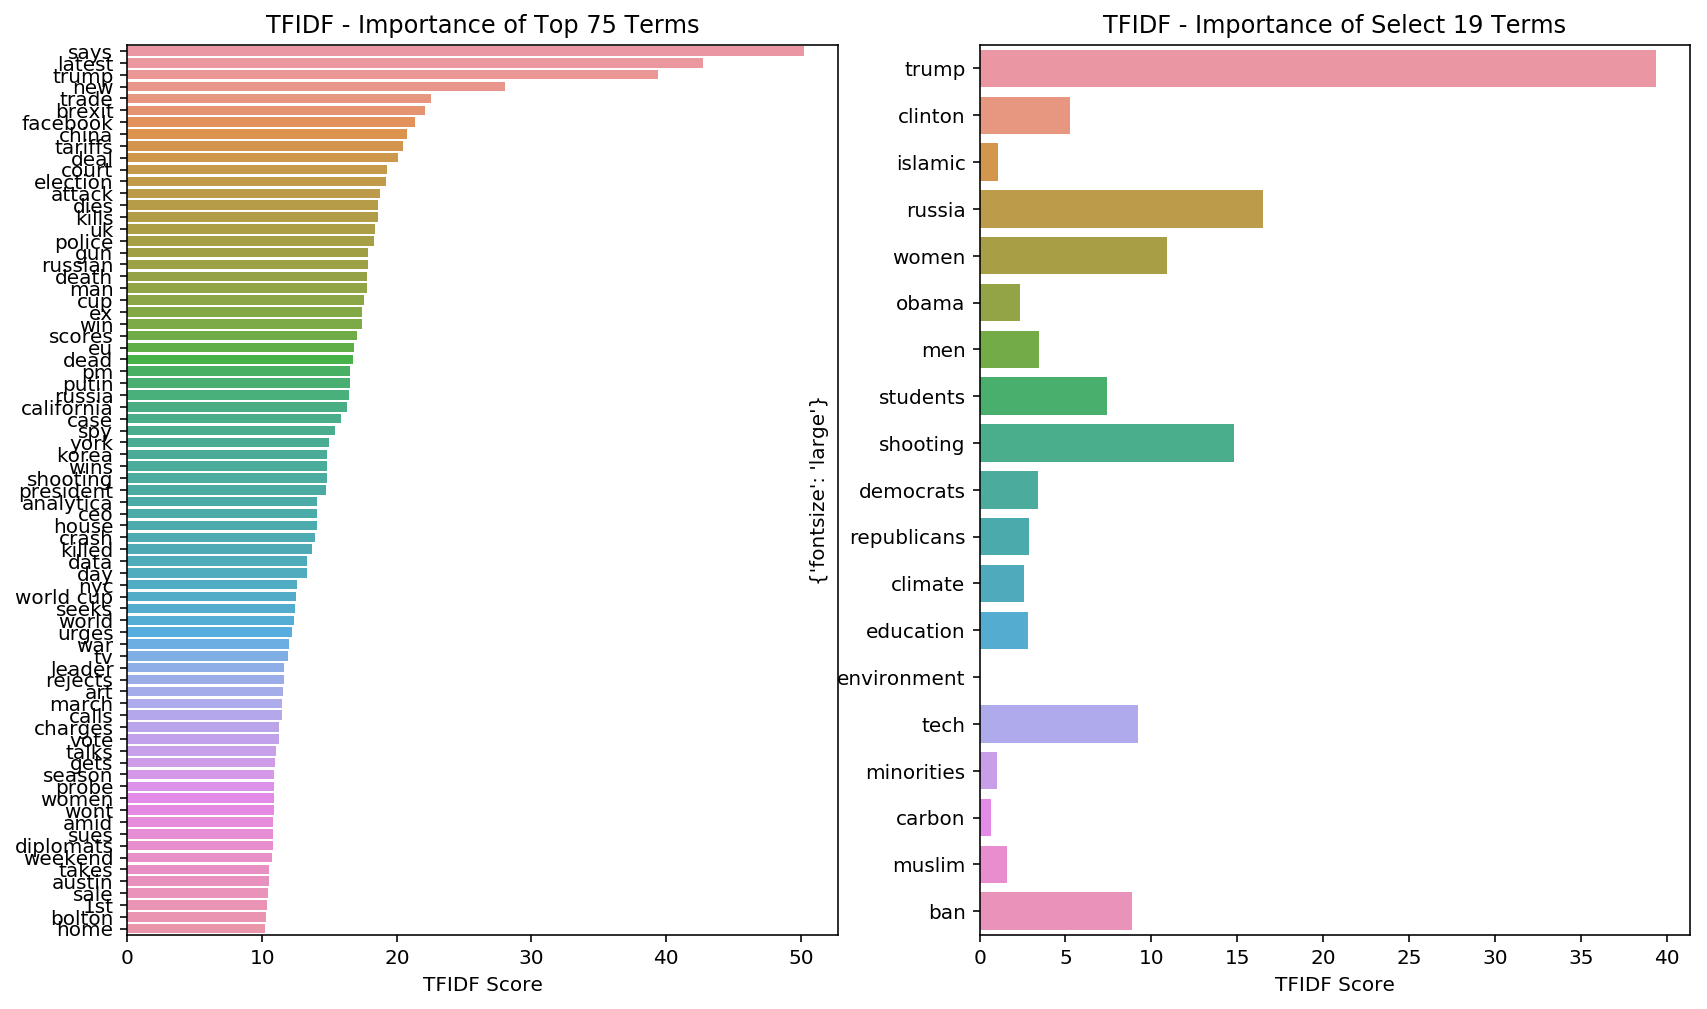

In [213]:
import matplotlib.pyplot as plt
import seaborn as sb
plot_tfidf_scores(scores, termNames, selectScores, selectTerms,  n_words = 18)